# <center style="font-size:30px">Fruit Recognition from images using Deep Learning</center>

### Author Details
- <b>Author:</b> Shanmukha Srinivas Jonnabatla
- <b>Email:</b> 1216shanmukha@gmail.com
- <b>LinkedIn:</b> https://www.linkedin.com/in/shanmukha-jonnabatla-8b5b98156/

# **Importing Libraries**

In [ ]:
from sklearn.datasets import load_files
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input , Dense ,Conv2D , MaxPooling2D , Flatten , Activation , Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# **Dataset properties**

Total number of images: 90483

Training set size: 67692 images(one fruit or one vegetable per image)

Test set size: 22688 images(one fruit or vegetable per image)

Number of classes: 131(fruits and vegetables) 

# **Loading train and test datasets**

In [ ]:
train_dir = 'Fruit-Images-Dataset-master/Training'
test_dir = 'Fruit-Images-Dataset-master/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  67692
Testing set size :  22688


In [ ]:
no_of_classes = len(np.unique(y_train))

In [ ]:
y_train[0:10]

array([ 27,  73,  68, 114, 117,  80,  72,   2,  90, 130])

# **Converting y_train values into categorical type**

In [ ]:
y_train = to_categorical(y_train,no_of_classes)
y_test = to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_train[0]

'Fruit-Images-Dataset-master/Training\\Cherry 2\\r_263_100.jpg'

# **Converting train and test datasets into numpy arrays**

In [ ]:
IMG_SIZE = 100
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        img = cv2.imread(file) #read the image
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) 
        images_as_array.append(np.array(img))
    return images_as_array
x_train = np.array(convert_image_to_array(x_train), dtype='float32') / 255.0
print('Training set shape : ',x_train.shape)

x_test = np.array(convert_image_to_array(x_test), dtype='float32') / 255.0
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Test set shape :  (22688, 100, 100, 3)
1st training image shape  (100, 100, 3)


# **Plot sample images**

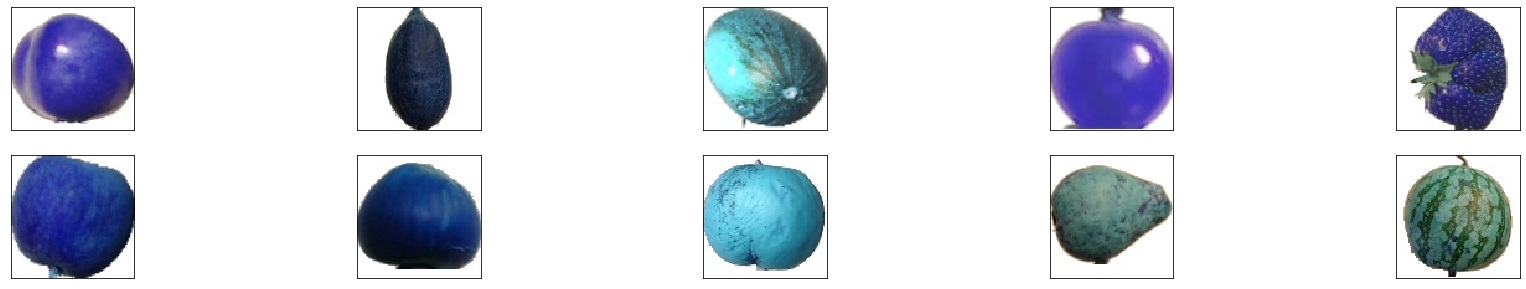

In [ ]:
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

# **CNN model**

In [ ]:
# Initialising the CNN
model = Sequential()

# 1st Convolutional layer
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

# 2nd convolutional layer
model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

# 3rd convolutional layer
model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

# 4th convolutional layer
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# fully connected layer 1st layer
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(131,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      208       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
x_train.shape

(67692, 100, 100, 3)

In [ ]:
y_train.shape

(67692, 131)

# **Training the model**

In [ ]:
checkpointer = ModelCheckpoint(filepath = 'fruits_copy1.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=30,
        validation_split=0.2,
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/30

Epoch 00001: val_loss improved from inf to 0.07335, saving model to fruits_copy1.hdf5
1693/1693 - 212s - loss: 1.3551 - accuracy: 0.6307 - val_loss: 0.0733 - val_accuracy: 0.9774
Epoch 2/30

Epoch 00002: val_loss improved from 0.07335 to 0.07290, saving model to fruits_copy1.hdf5
1693/1693 - 211s - loss: 0.2258 - accuracy: 0.9251 - val_loss: 0.0729 - val_accuracy: 0.9777
Epoch 3/30

Epoch 00003: val_loss improved from 0.07290 to 0.00746, saving model to fruits_copy1.hdf5
1693/1693 - 210s - loss: 0.1307 - accuracy: 0.9574 - val_loss: 0.0075 - val_accuracy: 0.9984
Epoch 4/30

Epoch 00004: val_loss improved from 0.00746 to 0.00210, saving model to fruits_copy1.hdf5
1693/1693 - 210s - loss: 0.0988 - accuracy: 0.9691 - val_loss: 0.0021 - val_accuracy: 0.9997
Epoch 5/30

Epoch 00005: val_loss improved from 0.00210 to 0.00153, saving model to fruits_copy1.hdf5
1693/1693 - 210s - loss: 0.0848 - accuracy: 0.9745 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 6/30

Epoch 00006: val_

In [ ]:
model.load_weights('fruits_copy1.hdf5')

# **Evaluating the model**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9787111878395081


In [ ]:
y_pred = model.predict(x_test) # Returns the predicted items

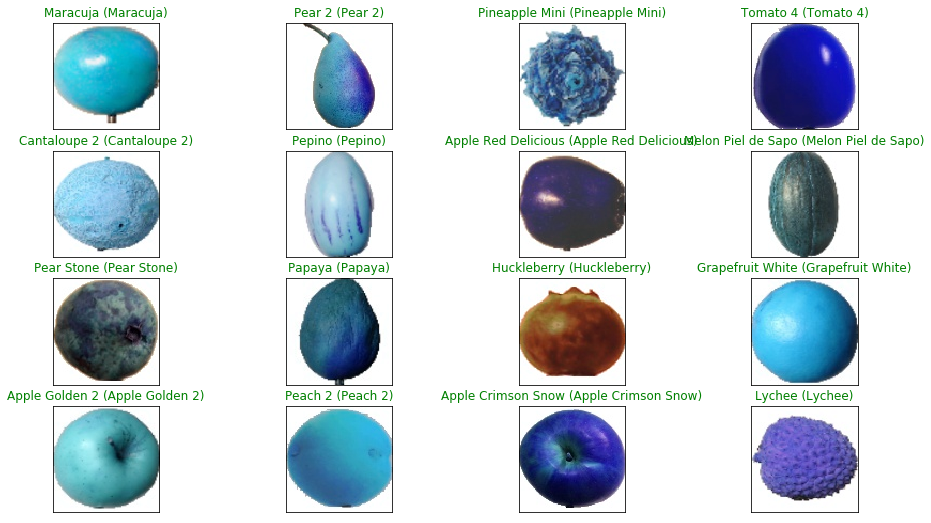

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# **Plotting graphs of history for accuracy and Loss**

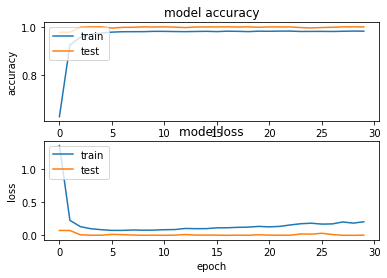

In [ ]:
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


# **Represent model as JSON string**

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## References
- https://github.com/Horea94/Fruit-Images-Dataset/blob/master/papers/fruit_recognition_deep_learning.pdf